<a href="https://colab.research.google.com/github/abdullahwarraichh/Machine-Learning-Projects/blob/main/Perdiciting_Health_Insurance_cost_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving insurance.csv to insurance.csv
Epoch 1/10000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 - 2s - 70ms/step - loss: 13236.5176 - mean_absolute_error: 13236.5176 - mean_squared_error: 320563744.0000 - val_loss: 13318.4453 - val_mean_absolute_error: 13318.4453 - val_mean_squared_error: 328524928.0000
Epoch 2/10000
34/34 - 1s - 25ms/step - loss: 13197.1387 - mean_absolute_error: 13197.1387 - mean_squared_error: 319438272.0000 - val_loss: 13265.4404 - val_mean_absolute_error: 13265.4404 - val_mean_squared_error: 327027456.0000
Epoch 3/10000
34/34 - 0s - 4ms/step - loss: 13119.3115 - mean_absolute_error: 13119.3115 - mean_squared_error: 317271616.0000 - val_loss: 13152.4922 - val_mean_absolute_error: 13152.4922 - val_mean_squared_error: 323857792.0000
Epoch 4/10000
34/34 - 0s - 3ms/step - loss: 12960.2236 - mean_absolute_error: 12960.2236 - mean_squared_error: 312850400.0000 - val_loss: 12932.1445 - val_mean_absolute_error: 12932.1445 - val_mean_squared_error: 317753344.0000
Epoch 5/10000
34/34 - 0s - 4ms/step - loss: 12667.6602 - mean_absolute_error: 12667.6602 - mean_squa

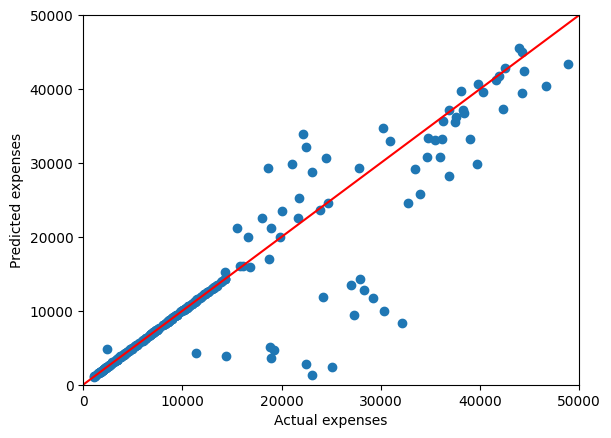

In [1]:
# Import necessary libraries for data handling, visualization, and machine learning
import matplotlib.pyplot as plt  # For plotting and visualizing data
import numpy as np               # For numerical operations on arrays
import pandas as pd              # For manipulating the dataset
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
import tensorflow as tf  # To build and train the neural network

# Keras components for building the neural network
from tensorflow.keras.models import Sequential  # For building a sequential model
from tensorflow.keras.layers import Dense       # For fully connected (dense) layers
from tensorflow.keras.callbacks import EarlyStopping  # To prevent overfitting during training

# Import Google Colab's files module to upload the file
from google.colab import files

# Upload the dataset from your local machine
uploaded = files.upload()  # Prompts file upload; upload 'insurance.csv'

# Load the uploaded file into a pandas DataFrame
df = pd.read_csv("insurance.csv")  # Ensure the filename matches what you uploaded

# Encode categorical variables by creating dummy variables
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')], axis=1)  # Convert 'sex' column into dummies
df.drop('sex', axis=1, inplace=True)  # Remove the original 'sex' column

df = pd.concat([df, pd.get_dummies(df['smoker'], prefix='smoker')], axis=1)  # Convert 'smoker' column
df.drop('smoker', axis=1, inplace=True)  # Drop the original 'smoker' column

df = pd.concat([df, pd.get_dummies(df['region'], prefix='region')], axis=1)  # Convert 'region' column
df.drop('region', axis=1, inplace=True)  # Remove the original 'region' column

# Define feature columns and target variable
features = df.columns.drop('expenses')  # Exclude 'expenses' as it's the target variable
X = df[features].values.astype(float)  # Convert features to a numpy array of float type
y = df['expenses'].values.astype(float)  # Convert target variable to float type

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the architecture of the neural network
network = Sequential()  # Initialize the Sequential model
network.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 50 neurons
network.add(Dense(units=25, activation='relu'))  # Second hidden layer with 25 neurons
network.add(Dense(units=1))  # Output layer with 1 neuron for regression output

# Compile the model with loss function and optimizer
network.compile(optimizer='adam', loss='mean_absolute_error',
                metrics=['mean_absolute_error', 'mean_squared_error'])  # Use MAE and MSE as metrics

# Implement early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1,
                               restore_best_weights=True)  # Stop training if no improvement

# Train the model on the training data and validate using the test data
network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, callbacks=[early_stopping], verbose=2)

# Evaluate the model on the test data
evaluation = network.evaluate(X_test, y_test, verbose=2)
print(f"Testing set Mean Absolute Error: {evaluation[1]:.2f} expenses")

# Generate predictions for the test set
y_pred = network.predict(X_test).flatten()  # Flatten the predictions to match the shape of true labels

# Plot the true values versus predictions
plt.scatter(y_test, y_pred)  # Scatter plot of true vs predicted values
plt.xlabel('Actual expenses')  # Label for x-axis
plt.ylabel('Predicted expenses')  # Label for y-axis
plt.plot([0, 50000], [0, 50000], color='red')  # Line for perfect predictions (diagonal)
plt.xlim([0, 50000])  # Set limits for x-axis
plt.ylim([0, 50000])  # Set limits for y-axis
plt.show()  # Display the plot

